**Conceptos necesarios de teoría**:
MNIST, Inicialización de pesos, One-hot enconding, Softmax, Train-Validation-Test, Cross-entropy, SGD, Batches, Shallow/deep net, Detectar overfitting, learning rate (con decay), batch size, época, dropout.

Después de familiarizarnos con la librería TensorFlow es el momento de implementar la segunda red neuronal del curso. El objetivo de dicha red va a ser el de **identificar digitos del 0 al 9 escritos de forma manual**. El set de datos **MNIST** es un conjunto de  70000 imágenes de $28 \times 28$ pixels que contienen números manuscritos junto con la etiqueta solución del número codificado (i.e. nuestro ground truth). 

![mnist](https://drive.google.com/uc?id=1uvFNAFTVb58xPoSt_3F_9DLs47ZIyPFm)

Cabe destacar que, por convención, MNIST dispone de una división específica en conjuntos de entrenamiento, validación y test. Este dataset es el "Hola Mundo" del aprendizaje profundo y es de gran utilidad para validar nuevos métodos propuestos ya que hace de *benchmark* permitiendo establecer comparativas justas. Debido a su gran popularidad las principales librerias destinadas al aprendizaje profundo permiten cargarlo directamente en nuestro código. Así que sin más dilación vamos a cargar los datos y a visualizarlos:

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
El conjunto de entrenamiento tiene dimensiones:  (55000, 784)
El conjunto de validación tiene dimensiones:  (5000, 784)
El conjunto de test tiene dimensiones:  (10000, 784)


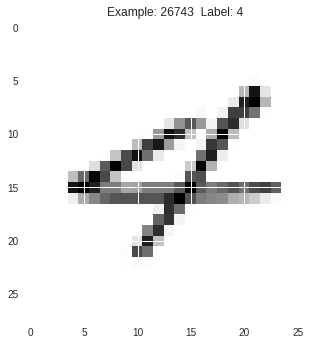

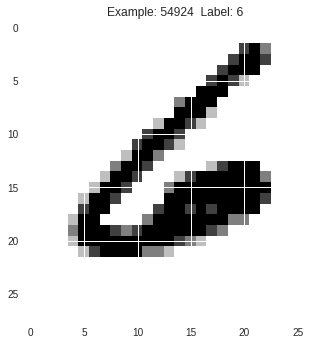

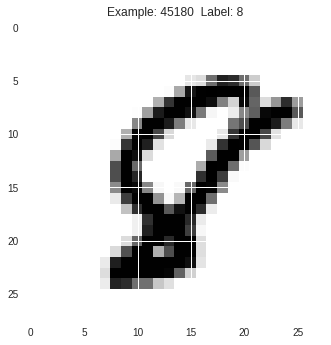

In [2]:
# Imports necesarios
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", mnist.train.images.shape)
print("El conjunto de validación tiene dimensiones: ",mnist.validation.images.shape)
print("El conjunto de test tiene dimensiones: ",mnist.test.images.shape)

# Método para visualizar los datos de entrenamiento
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = mnist.train.images[num,:].reshape([28,28]) #(X)
  # Seleccionar el target num de mnist.train.labels (Recuerda que esta en one-hot encoding, conviertelo a decimal con argmax)
  label = mnist.train.labels[num,:].argmax(axis=0) #(X)
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, mnist.train.images.shape[0]))
display_digit(np.random.randint(0, mnist.train.images.shape[0]))
display_digit(np.random.randint(0, mnist.train.images.shape[0]))

# Ejecuta el código varias veces y comprueba la variabilidad existente en los datos

**EJERCICIO 1.** Una vez visualizadas ciertas muestras de nuestro conjunto de datos,  vamos a entrenar un **perceptrón simple** (como el de la primera sesión). Recordad que en el perceptrón simple las entradas se ponderan por ciertos pesos y se suman en cada una de las neuronas de salida. Posteriormente emplearemos la función **Softmax** que hemos explicado en la sesión teórica, calculando las predicciones como $\hat{Y}=softmax(X∗W+B)$ y minimizando la función de entropía cruzada o **cross-entropy** siguiendo la formula: 

>>>>>>>>$Coste = - \displaystyle\sum_j y_j log(p_j)$

donde $y_j$ es el *ground truth* para la clase $j$ y $p_j$ el valor de probabilidad asignado a dicha clase a la salida.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[INFO]: Época 0 ---> Acc_train = 0.7643138111888123 - Loss_train = 1.5861584281587926 - Acc_val = 0.8127999901771545 - Loss_val = 1.147428274154663
[INFO]: Época 1 ---> Acc_train = 0.8248834498834507 - Loss_train = 0.9813306376094864 - Acc_val = 0.8434000015258789 - Loss_val = 0.8396137952804565
[INFO]: Época 2 ---> Acc_train = 0.8421110139860125 - Loss_train = 0.7811276229111463 - Acc_val = 0.8543999791145325 - Loss_val = 0.7054004073143005
[INFO]: Época 3 ---> Acc_train = 0.8530922202797203 - Loss_train = 0.6808713218826801 - Acc_val = 0.8636000156402588 - Loss_val = 0.6289995312690735
[INFO]: Época 4 ---> Acc_train = 0.8601216491841495 - Loss_train = 0.6202894123423077 - Acc_val = 0.8705999851226807 - Loss_val = 0.5783849358558655
[INFO]: Época 5 ---> Acc_train = 0.8649293414918412 - Loss_train = 0.5781244070796702 - Acc_val = 0.8745999932289124 - Loss_val = 0.5425

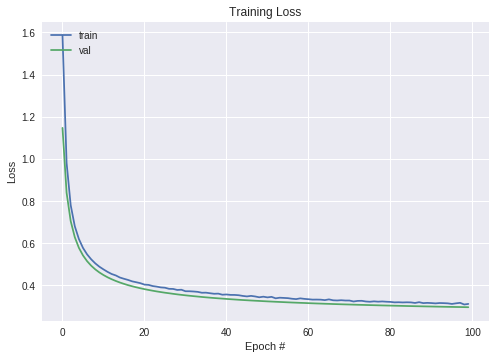

In [0]:
# Hiper-parámetros de nuestra red
lr = 0.005
n_epochs = 100
batch_size = 128

# Creamos placeholders para ir almacenando los datos de entrada y los labels
X = tf.placeholder(tf.float32, [None, 784]) #(X) # Imágenes del mnist: 28*28 = 784
Y_true = tf.placeholder(tf.float32, [None, 10]) #(X) # Número indicando la clase 0-9 => 10 clases

# Creamos e inicializamos con ceros las variables W y b
W = tf.Variable(tf.zeros([784, 10])) #(X)
b = tf.Variable(tf.zeros([10])) #(X)

# Calculamos las predicciones
Y_pred = tf.nn.softmax(tf.matmul(X,W) + b) #(X)

# Definimos función de pérdidas (Cross_entropy)
loss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), reduction_indices=1)) #(X)
#loss = tf.reduce_mean(-tf.reduce_sum(Y_true*tf.log(Y_pred), reduction_indices=1))

# Optimizador SGD
train = tf.train.GradientDescentOptimizer(lr).minimize(loss) #(X)

# % de predicciones correctas en un determinado batch (i.e. accuracy)
is_correct = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_true,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Inicializamos variables
init = tf.initializers.global_variables() #(X)

# Abrimos la sesión
with tf.Session() as sess:
  sess.run(init) #(X)
  # Entrenamiento de nuestra red
  acc_epoch_tr = []
  acc_epoch_val = []
  loss_epoch_tr = []
  loss_epoch_val = []
  for epoch in range(n_epochs):
    avg_acc = 0.
    avg_loss = 0.
    steps = int(mnist.train.num_examples/batch_size) #(X) Calcular número de batches
    for i in range(steps):
      batch_X, batch_Y = mnist.train.next_batch(batch_size) #(X) # Pedir un nuevo batch del set de datos (emplear función next_batch)
      sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Entrenamos 
      a,l = sess.run([accuracy, loss], feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Calculamos accuracy y cross_entropy del batch
      avg_acc += a / steps #(X) Calcular el accuracy medio de los diferentes batches
      avg_loss += l / steps #(X) Calcular las pérdidas medias de los diferentes batches
    # Almacenamos el accuracy y las losses medios para cada época
    acc_epoch_tr.append(avg_acc) #(X)
    loss_epoch_tr.append(avg_loss) #(X)
    # Calculamos accuracy y losses en validation
    a_val, l_val = sess.run([accuracy, loss], feed_dict={X: mnist.validation.images, Y_true: mnist.validation.labels}) #(X)
    acc_epoch_val.append(a_val) #(X)
    loss_epoch_val.append(l_val) #(X)
    # Sacamos información por pantalla
    print("[INFO]: Época {} ---> Acc_train = {} - Loss_train = {} - Acc_val = {} - Loss_val = {}".format(epoch, avg_acc, avg_loss, a_val, l_val)) #(X)
  
  # Cálculo de accuracy y losses en el conjunto de test
  a_test, l_test = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels}) #(X)
  print("[INFO]: Accuracy en test = {} - Losses en test = {}".format(a_test, l_test)) #(X)
  
  # Gráficar losses por época
  plt.plot(np.arange(0, n_epochs), loss_epoch_tr) #(X)
  plt.plot(np.arange(0, n_epochs), loss_epoch_val)
  plt.legend(['train', 'val'], loc='upper left')
  plt.title('Training Loss') #(X)
  plt.xlabel('Epoch #') #(X)
  plt.ylabel('Loss') #(X)
  
  #¿Que se puede observar de las gráficas?¿Según hemos visto en la teoría, se aprecia overfitting?

**EJERCICIO 2.** Si todo ha ido bien vuestra perceptron simple con TensorFlow será capaz de reconocer con una precisión en torno al 92% dígitos del 0 al 9 escritos a mano! A continuación vamos a **incluir una primera hidden layer de 200 neuronas** al perceptrón simple que hemos desarrollado en el ejercicio anterior para **descubrir el efecto de dar profundidad a nuestra red** creando ya un *multilayer perceptron*. Para ello habrá que definir las variables ```(W1, B1)``` y ```(W2, B2)``` en TensorFlow y re-calcular  las predicciones como $\hat{Y} = softmax(Y1*W2 + B2)$ siendo $Y1 = sigmoid(X*W1+ B1)$.

Hay que tener en cuenta que conforme le damos profundidad a la red es importante inicializar los pesos (```W1``` y ```W2``` en nuestro caso) con **valores aleatorios siguiendo una distribución gaussiana**. De otra forma, el optimizador puede quedarse atascado en la posición inicial y no ser capaz de moverse en la dirección del mínimo de la función de pérdidas. Por ello, utilizaremos la función de TensorFlow  **``` tf.truncated_normal```**, tal y como se indica en la documentación de TF.

Además vamos a aprovechar este ejercicio para convertir nuestro código dejado caer en un script a una función cuya cabecera será la siguiente:

```
def train_shallow_net(learning_rate, batch_size, num_epochs)
```

**Nota**: Copiad y pegad el código anterior en una nueva celda y convertidlo en función. Posteriormente añadid la segunda capa oculta

1. Tras la modificación, se debe ejecutar la función ```train_shallow_net``` con sus parámetros de entrada tomando el valor del apartado anterior. ¿Qué sucede? **Sol.** No se percibe la influencia de hacer la red más profunda puesto que el número de épocas es pequeño para ello.
2. Ahora, lanza de nuevo el entrenamiento de nuestra shallow net pero con un valor de **```n_epochs = 1000```**. ¿Que sucede ahora?¿Se aprecia la influencia de darle profundidad a la red?¿Existe overfitting? **Sol.** Ahora si que se aprecia la mejora, concretamente obtenemos una precisión en torno al 97% SIN overfitting, esto último es importantisimo!! 

**Nota**: La última ejecución tardará unos 20 minutos, por lo que puedes aprovechar para leer detenidamente el siguiente apartado.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[INFO]: Época 0 ---> Acc_train = 0.3821569055944058 - Loss_train = 2.131403565962552 - Acc_val = 0.5511999726295471 - Loss_val = 1.9694691896438599
[INFO]: Época 1 ---> Acc_train = 0.6360176282051279 - Loss_train = 1.836847630969849 - Acc_val = 0.6743999719619751 - Loss_val = 1.6989984512329102
[INFO]: Época 2 ---> Acc_train = 0.7108282342657345 - Loss_train = 1.5890580201760311 - Acc_val = 0.7328000068664551 - Loss_val = 1.469381332397461
[INFO]: Época 3 ---> Acc_train = 0.7497450466200468 - Loss_train = 1.383122135153461 - Acc_val = 0.771399974822998 - Loss_val = 1.2817035913467407
[INFO]: Época 4 ---> Acc_train = 0.7760416666666671 - Loss_train = 1.2158728076583565 - Acc_val = 0.7875999808311462 - Loss_val = 1.1323585510253906
[INFO]: Época 5 ---> Acc_train = 0.796692890442891 - Loss_train = 1.0840623710816835 - Acc_val = 0.8050000071525574 - Loss_val = 1.014958858

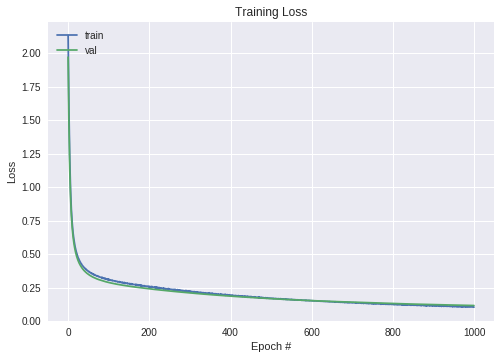

In [0]:
def train_shallow_net(learning_rate, batch_size, num_epochs):
  # Creamos placeholders para ir almacenando los datos de entrada y los labels
  X = tf.placeholder(tf.float32, [None, 784]) #(X) # Imágenes del mnist: 28*28 = 784
  Y_true = tf.placeholder(tf.float32, [None, 10]) #(X) # Número indicando la clase 0-9 => 10 clases

  # Creamos e inicializamos las variables W y b con valores aleatorios que sigan una distribución normal
  W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1)) #(X)
  B1 = tf.Variable(tf.zeros([200])) #(X)
  W2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1)) #(X)
  B2 = tf.Variable(tf.zeros([10])) #(X)

  # Calculamos las predicciones
  Y1 = tf.nn.sigmoid(tf.matmul(X,W1) + B1) #(X)
  Y_pred = tf.nn.softmax(tf.matmul(Y1,W2) + B2) #(X)

  # Definimos función de pérdidas (Cross_entropy)
  loss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), reduction_indices=1)) #(X)
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true*tf.log(Y_pred), reduction_indices=1))

  # Optimizador SGD
  train = tf.train.GradientDescentOptimizer(lr).minimize(loss) #(X)

  # % de predicciones correctas en un determinado batch (i.e. accuracy)
  is_correct = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_true,1))
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
  # Inicializamos variables
  init = tf.initializers.global_variables() #(X)

  # Abrimos la sesión
  with tf.Session() as sess:
    sess.run(init) #(X)
    # Entrenamiento de nuestra red
    acc_epoch_tr = []
    acc_epoch_val = []
    loss_epoch_tr = []
    loss_epoch_val = []
    for epoch in range(n_epochs):
      avg_acc = 0.
      avg_loss = 0.
      steps = int(mnist.train.num_examples/batch_size) #(X) Calcular número de batches
      for i in range(steps):
        batch_X, batch_Y = mnist.train.next_batch(batch_size) #(X) # Pedir un nuevo batch del set de datos (emplear función next_batch)
        sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Entrenamos 
        a,l = sess.run([accuracy, loss], feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Calculamos accuracy y cross_entropy del batch
        avg_acc += a / steps #(X) Calcular el accuracy medio de los diferentes batches
        avg_loss += l / steps #(X) Calcular las pérdidas medias de los diferentes batches
      # Almacenamos el accuracy y las losses medios para cada época
      acc_epoch_tr.append(avg_acc) #(X)
      loss_epoch_tr.append(avg_loss) #(X)
      # Calculamos accuracy y losses en validation
      a_val, l_val = sess.run([accuracy, loss], feed_dict={X: mnist.validation.images, Y_true: mnist.validation.labels}) #(X)
      acc_epoch_val.append(a_val) #(X)
      loss_epoch_val.append(l_val) #(X)
      # Sacamos información por pantalla
      print("[INFO]: Época {} ---> Acc_train = {} - Loss_train = {} - Acc_val = {} - Loss_val = {}".format(epoch, avg_acc, avg_loss, a_val, l_val)) #(X)

    # Cálculo de accuracy y losses en el conjunto de test
    a_test, l_test = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels}) #(X)
    print("[INFO]: Accuracy en test = {} - Losses en test = {}".format(a_test, l_test)) #(X)

    # Gráficar losses por época
    plt.plot(np.arange(0, n_epochs), loss_epoch_tr) #(X)
    plt.plot(np.arange(0, n_epochs), loss_epoch_val)
    plt.legend(['train', 'val'], loc='upper left')
    plt.title('Training Loss') #(X)
    plt.xlabel('Epoch #') #(X)
    plt.ylabel('Loss') #(X)
    
# Lanzamos entrenamiento
lr = 0.005
b_size = 128
n_epochs = 1000
train_shallow_net(lr, b_size, n_epochs)

**EJERCICIO 3.** A continuación vamos a relizar **una serie de ejecuciones** empleando la función desarrollada en el apartado anterior con el objetivo de **analizar la influencia** que tienen los parámetros **```learning_rate```** y **```batch_size```**.

- En primer lugar vamos a fijar los valos valores de **```batch_size = 128```** y **```num_epochs=15```** y vamos a realizar tres ejecuciones de nuestra red (en tres celdas distintas) con valores de **```learning_rate = 4```**, **```learning_rate = 0.1```** y **```learning_rate = 0.0001```**, respectivamente.


1.   ¿Que se puede observar? Relacionad las gráficas de pérdidas obtenidas con la gráfica que os proporcionamos en el apartado teórico de la explicación de la tasa de aprendizaje. **Sol.** En la primera ejecución se evidencia que un aumento desmesurado de la tasa de aprendizaje puede resultar en overfitting. En la segunda ejecución observamos que lr = 0.1 nos ofrece un resultado de clasificación aceptable en sólo 15 épocas. Concretamente del mismo orden que el perceptrón simple en 100 épocas y SIN overfitting. En la última ejecución vemos que la tasa de aprendizaje es demasiado pequeña para que nuestro modelo sea capaz de aprender en tan solo 15 épocas. 

[INFO]: Época 0 ---> Acc_train = 0.893684440559442 - Loss_train = 0.4088079466252195 - Acc_val = 0.9277999997138977 - Loss_val = 0.2410971224308014
[INFO]: Época 1 ---> Acc_train = 0.9676573426573436 - Loss_train = 0.12575401661001442 - Acc_val = 0.9488000273704529 - Loss_val = 0.17729631066322327
[INFO]: Época 2 ---> Acc_train = 0.9770906177156178 - Loss_train = 0.09610151070102799 - Acc_val = 0.954800009727478 - Loss_val = 0.16060331463813782
[INFO]: Época 3 ---> Acc_train = 0.9816979895104898 - Loss_train = 0.07705874761701115 - Acc_val = 0.9607999920845032 - Loss_val = 0.13937431573867798
[INFO]: Época 4 ---> Acc_train = 0.985467657342659 - Loss_train = 0.06515152554846167 - Acc_val = 0.9588000178337097 - Loss_val = 0.14043569564819336
[INFO]: Época 5 ---> Acc_train = 0.9877804487179501 - Loss_train = 0.05735023470382728 - Acc_val = 0.9621999859809875 - Loss_val = 0.13855710625648499
[INFO]: Época 6 ---> Acc_train = 0.9890734265734282 - Loss_train = 0.051455045854868244 - Acc_val =

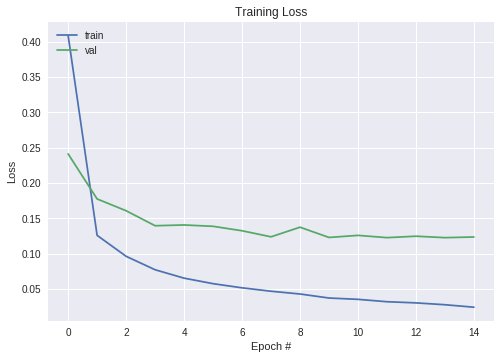

In [0]:
# Lanzamos las tres ejecuciones
b_size = 128
n_epochs = 15
lr = 4
train_shallow_net(lr, b_size, n_epochs)

[INFO]: Época 0 ---> Acc_train = 0.7934513403263409 - Loss_train = 0.9369914704686283 - Acc_val = 0.876800000667572 - Loss_val = 0.5070046782493591
[INFO]: Época 1 ---> Acc_train = 0.8850524475524469 - Loss_train = 0.4395999838283289 - Acc_val = 0.899399995803833 - Loss_val = 0.3780016601085663
[INFO]: Época 2 ---> Acc_train = 0.8984010780885779 - Loss_train = 0.3671395872786884 - Acc_val = 0.9074000120162964 - Loss_val = 0.3315204381942749
[INFO]: Época 3 ---> Acc_train = 0.9069602272727266 - Loss_train = 0.32924923821762725 - Acc_val = 0.9133999943733215 - Loss_val = 0.3081849217414856
[INFO]: Época 4 ---> Acc_train = 0.9122960372960375 - Loss_train = 0.3093574159281517 - Acc_val = 0.9179999828338623 - Loss_val = 0.2912130355834961
[INFO]: Época 5 ---> Acc_train = 0.9159564393939392 - Loss_train = 0.29561907341291305 - Acc_val = 0.9218000173568726 - Loss_val = 0.2796415090560913
[INFO]: Época 6 ---> Acc_train = 0.9191797785547782 - Loss_train = 0.28071451652578 - Acc_val = 0.92640000

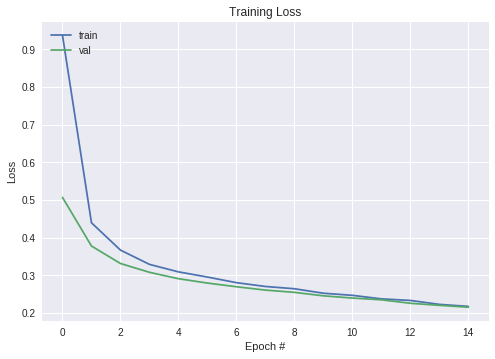

In [0]:
b_size = 128
n_epochs = 15
lr = 0.1
train_shallow_net(lr, b_size, n_epochs)

[INFO]: Época 0 ---> Acc_train = 0.0704581876456876 - Loss_train = 2.5050367002998466 - Acc_val = 0.07259999960660934 - Loss_val = 2.472466468811035
[INFO]: Época 1 ---> Acc_train = 0.0661239801864802 - Loss_train = 2.446848021798476 - Acc_val = 0.06800000369548798 - Loss_val = 2.420386791229248
[INFO]: Época 2 ---> Acc_train = 0.0689466783216783 - Loss_train = 2.3985669523963855 - Acc_val = 0.0697999969124794 - Loss_val = 2.381498336791992
[INFO]: Época 3 ---> Acc_train = 0.07508377039627037 - Loss_train = 2.3653125573983016 - Acc_val = 0.07660000026226044 - Loss_val = 2.351917266845703
[INFO]: Época 4 ---> Acc_train = 0.08103875291375295 - Loss_train = 2.3372292151817913 - Acc_val = 0.08959999680519104 - Loss_val = 2.3295817375183105
[INFO]: Época 5 ---> Acc_train = 0.09586247086247096 - Loss_train = 2.3180324030922863 - Acc_val = 0.10480000078678131 - Loss_val = 2.312019109725952
[INFO]: Época 6 ---> Acc_train = 0.1146743881118882 - Loss_train = 2.3020907998918645 - Acc_val = 0.1296

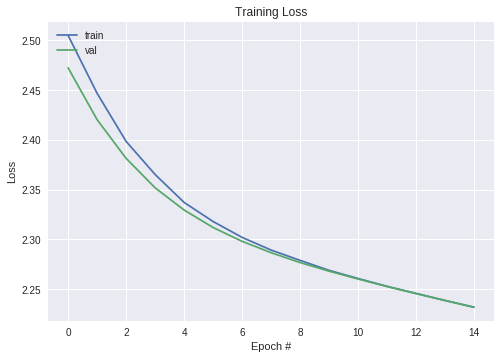

In [0]:
b_size = 128
n_epochs = 15
lr = 0.0001
train_shallow_net(lr, b_size, n_epochs)

- En segundo lugar, **vamos a fijar la mejor tasa de aprendizaje de las obtenidas anteriormente** (obviando los valores de learning rate que propicien *overfitting*), es decir,  **```learning_rate = 0.01```**. El número de épocas lo mantenemos en **```num_epochs=15```** (para observar los resultados en un tiempo permisible) y vamos a realizar **cuatro ejecuciones de nuestra red** (en cuatro celdas distintas) con valores de **```batch_size = 32```**, **```batch_size = 256```**, **```batch_size = 2048```** y  **```batch_size = 8192```** respectivamente.
 

1.   ¿Que se puede observar atendiento al apartado temporal?¿Que influencia tiene el batch size en el tiempo de ejecución?¿Por que sucede esto? **Sol**. A medida que aumenta el tamaño de batch disminuye el coste computacional puesto que se hace un menor número de actualizaciones de los pesos por época. Bien es cierto que para el cálculo del descenso por gradiente se emplean muchas más muestras por lo que aumenta la robustez.
2.   ¿Que ocurre para un **```batch_size = 32```** desde el punto de vista de la clasificación? ¿Que parámetro se podría variar para evitar este suceso negativo? **Sol**. Se produce overfitting porque estamos haciendo demasiadas actualizaciones de los pesos (el número de actualizaciones depende del batch size) a una lr muy alta. Recordemos que si utilizo ```batch_size = 32``` haré N actualizaciones de los pesos por época (dónde N es el número de imágenes de entrenamiento). Otra consecuencia de esto es un alto coste computacional, básicamente como si entrenará en CPU.

3. ¿Que ocurre para un **```batch_size = 8192```** desde el punto de vista de la clasificación?¿Que parámetro se podría variar para mejorar el aprendizaje? **Sol.** Con tan pocas actualizaciones de los pesos por época no le da tiempo a aprender. Es necesario aumentar el learning rate.

[INFO]: Época 0 ---> Acc_train = 0.8815301222351444 - Loss_train = 0.4859231889629537 - Acc_val = 0.9093999862670898 - Loss_val = 0.31958433985710144
[INFO]: Época 1 ---> Acc_train = 0.9256948486612189 - Loss_train = 0.26862855086035853 - Acc_val = 0.9273999929428101 - Loss_val = 0.26558324694633484
[INFO]: Época 2 ---> Acc_train = 0.9364449941792652 - Loss_train = 0.23209399608320594 - Acc_val = 0.9315999746322632 - Loss_val = 0.23765932023525238
[INFO]: Época 3 ---> Acc_train = 0.943120634458659 - Loss_train = 0.2054000618142253 - Acc_val = 0.9408000111579895 - Loss_val = 0.21427752077579498
[INFO]: Época 4 ---> Acc_train = 0.9505784342258309 - Loss_train = 0.1827491696000237 - Acc_val = 0.946399986743927 - Loss_val = 0.19510453939437866
[INFO]: Época 5 ---> Acc_train = 0.9570176076833419 - Loss_train = 0.16239698625704224 - Acc_val = 0.949400007724762 - Loss_val = 0.17570801079273224
[INFO]: Época 6 ---> Acc_train = 0.9600371071012698 - Loss_train = 0.1492228065015657 - Acc_val = 0.

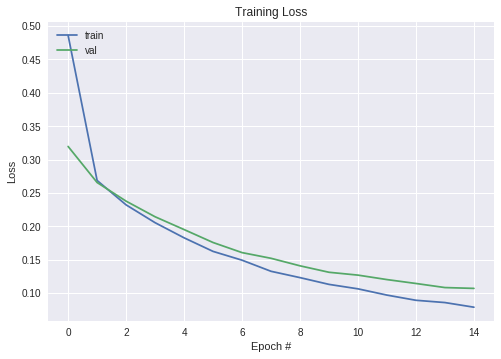

In [0]:
b_size = 32
n_epochs = 15
lr = 0.1
train_shallow_net(lr, b_size, n_epochs)

[INFO]: Época 0 ---> Acc_train = 0.7048773364485974 - Loss_train = 1.3223899572252105 - Acc_val = 0.8407999873161316 - Loss_val = 0.7646171450614929
[INFO]: Época 1 ---> Acc_train = 0.8580242406542061 - Loss_train = 0.6233599343311007 - Acc_val = 0.8741999864578247 - Loss_val = 0.5101212859153748
[INFO]: Época 2 ---> Acc_train = 0.8786507009345793 - Loss_train = 0.47605501296364255 - Acc_val = 0.890999972820282 - Loss_val = 0.4226084351539612
[INFO]: Época 3 ---> Acc_train = 0.8898218457943927 - Loss_train = 0.4148525439690206 - Acc_val = 0.8971999883651733 - Loss_val = 0.37930941581726074
[INFO]: Época 4 ---> Acc_train = 0.8953161507009348 - Loss_train = 0.384148211540463 - Acc_val = 0.902400016784668 - Loss_val = 0.35201597213745117
[INFO]: Época 5 ---> Acc_train = 0.9007922021028034 - Loss_train = 0.3562571432128132 - Acc_val = 0.906000018119812 - Loss_val = 0.3330969214439392
[INFO]: Época 6 ---> Acc_train = 0.9039500584112146 - Loss_train = 0.3437921327547492 - Acc_val = 0.9083999

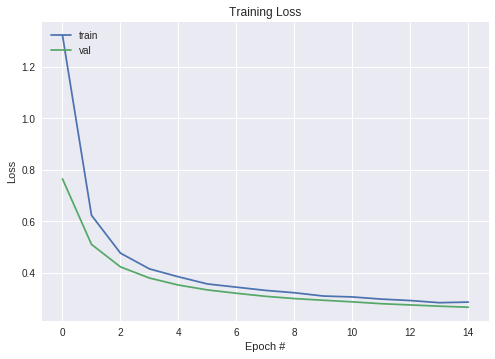

In [0]:
b_size = 256
n_epochs = 15
lr = 0.1
train_shallow_net(lr, b_size, n_epochs)

[INFO]: Época 0 ---> Acc_train = 0.3674879807692308 - Loss_train = 2.129067187125866 - Acc_val = 0.5771999955177307 - Loss_val = 1.946640968322754
[INFO]: Época 1 ---> Acc_train = 0.6492262620192308 - Loss_train = 1.7811377919637246 - Acc_val = 0.7071999907493591 - Loss_val = 1.6260038614273071
[INFO]: Época 2 ---> Acc_train = 0.73486328125 - Loss_train = 1.4985741055928747 - Acc_val = 0.7594000101089478 - Loss_val = 1.367505431175232
[INFO]: Época 3 ---> Acc_train = 0.7739821213942307 - Loss_train = 1.269872546195984 - Acc_val = 0.7907999753952026 - Loss_val = 1.1680920124053955
[INFO]: Época 4 ---> Acc_train = 0.801776592548077 - Loss_train = 1.1013212754176211 - Acc_val = 0.8126000165939331 - Loss_val = 1.0173120498657227
[INFO]: Época 5 ---> Acc_train = 0.8172137920673076 - Loss_train = 0.9697502576387844 - Acc_val = 0.8289999961853027 - Loss_val = 0.905415415763855
[INFO]: Época 6 ---> Acc_train = 0.8271484375 - Loss_train = 0.876274225803522 - Acc_val = 0.8424000144004822 - Loss_

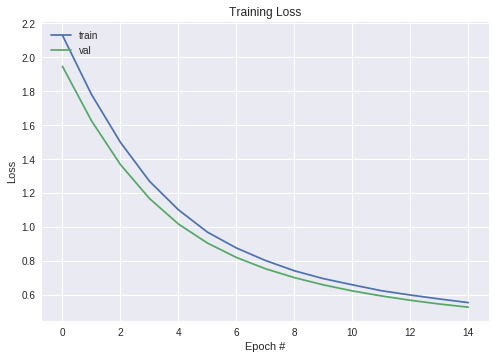

In [0]:
b_size = 2048
n_epochs = 15
lr = 0.1
train_shallow_net(lr, b_size, n_epochs)

[INFO]: Época 0 ---> Acc_train = 0.16766357421875 - Loss_train = 2.2757728894551597 - Acc_val = 0.24300000071525574 - Loss_val = 2.224226474761963
[INFO]: Época 1 ---> Acc_train = 0.33288574218749994 - Loss_train = 2.179786443710327 - Acc_val = 0.41600000858306885 - Loss_val = 2.1374611854553223
[INFO]: Época 2 ---> Acc_train = 0.4732869466145833 - Loss_train = 2.097332199414571 - Acc_val = 0.5465999841690063 - Loss_val = 2.0551059246063232
[INFO]: Época 3 ---> Acc_train = 0.5650838216145834 - Loss_train = 2.016733407974243 - Acc_val = 0.6078000068664551 - Loss_val = 1.9757392406463623
[INFO]: Época 4 ---> Acc_train = 0.6111043294270834 - Loss_train = 1.9405633807182312 - Acc_val = 0.6456000208854675 - Loss_val = 1.8986592292785645
[INFO]: Época 5 ---> Acc_train = 0.6448567708333334 - Loss_train = 1.865264316399892 - Acc_val = 0.6746000051498413 - Loss_val = 1.8250881433486938
[INFO]: Época 6 ---> Acc_train = 0.66619873046875 - Loss_train = 1.7955529093742368 - Acc_val = 0.691999971866

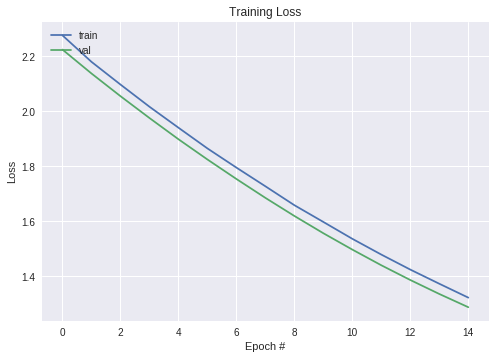

In [0]:
b_size = 8192
n_epochs = 15
lr = 0.1
train_shallow_net(lr, b_size, n_epochs)

**EJERCICIO 4.** Esta primera red que habeís desarrollado es una **shallow-net**. A partir de dos capas ocultas en adelante es cuando podemos hablar de redes neuronales profundas. Ahora vamos a realizar una nueva modificación en nuestra función (debemos definirla en una nueva celda con las modificaciones). Concretamente, **vamos a darle más profundidad a nuestra red** añadiendo tres capas ocultas más, a parte de las que ya tenemos, es decir, nuestra **deep net** estará compuesta por la entrada, **cuatro capas ocultas con 200, 100, 60 y 30 neuronas, respectivamente** y la **capa de salida con las 10 neuronas**. Además, vamos a hacer dos modificaciones más y vamos a extraer como parámetros de entrada a la función la capa de activación de las **hidden layers** y el optimizador. Con estos cambios,  cabecera el nuevo método tendrá la siguiente cabecera:

```
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer)
```

**Nota**: Copiad y pegad el código de la función anterior en una nueva celda, añadid tres capas ocultas extras y modificar la función de activación y el optimizador según el parámetro de entrada a la función.

- Tras haber realizado las modificaciones oportunas y disponiendo de la función ```train_deep_net```, llama a dicho método pasándole como parámetros de entrada los siguientes valores: **```learning_rate = 0.005```**, **```batch_size = 128```**, **```num_epochs = 50```**, **```act_function = tf.nn.relu```** y **```optimizer = tf.train.AdamOptimizer```**. ¿Que se puede observar de las curvas de pérdidas de training y validation?¿A que es debido dicho efecto? **Sol.** Se puede observar un claro patrón de overfitting. El modelo esta sobreajustando los pesos a los datos de entrenamiento y su capacidad de generalización ante nuevas muestras de test se ve perjudicada.


[INFO]: Época 0 ---> Acc_train = 0.9258814102564112 - Loss_train = 0.2435449400009253 - Acc_val = 0.9652000069618225 - Loss_val = 0.11205826699733734
[INFO]: Época 1 ---> Acc_train = 0.9746867715617717 - Loss_train = 0.0887535451488061 - Acc_val = 0.9675999879837036 - Loss_val = 0.10616990923881531
[INFO]: Época 2 ---> Acc_train = 0.9831366550116553 - Loss_train = 0.06155944193793692 - Acc_val = 0.9700000286102295 - Loss_val = 0.10661030560731888
[INFO]: Época 3 ---> Acc_train = 0.987652972027973 - Loss_train = 0.04690502240324708 - Acc_val = 0.9620000123977661 - Loss_val = 0.1297392100095749
[INFO]: Época 4 ---> Acc_train = 0.9893830128205146 - Loss_train = 0.03821761049883818 - Acc_val = 0.9733999967575073 - Loss_val = 0.10795538127422333
[INFO]: Época 5 ---> Acc_train = 0.9911494755244777 - Loss_train = 0.03287727153362889 - Acc_val = 0.9733999967575073 - Loss_val = 0.10240284353494644
[INFO]: Época 6 ---> Acc_train = 0.9929523601398628 - Loss_train = 0.026799315664567735 - Acc_val 

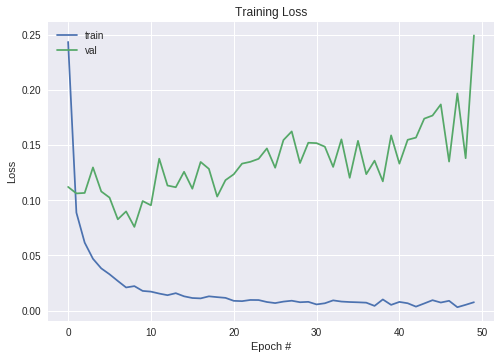

In [0]:
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer):
  # Creamos placeholders para ir almacenando los datos de entrada y los labels
  X = tf.placeholder(tf.float32, [None, 784]) #(X) # Imágenes del mnist: 28*28 = 784
  Y_true = tf.placeholder(tf.float32, [None, 10]) #(X) # Número indicando la clase 0-9 => 10 clases

  # Creamos e inicializamos las variables W y b con valores aleatorios que sigan una distribución normal
  W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1)) #(X)
  B1 = tf.Variable(tf.zeros([200])) #(X)
  W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1)) #(X)
  B2 = tf.Variable(tf.zeros([100])) #(X)
  W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1)) #(X)
  B3 = tf.Variable(tf.zeros([60])) #(X)
  W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1)) #(X)
  B4 = tf.Variable(tf.zeros([30])) #(X)
  W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1)) #(X)
  B5 = tf.Variable(tf.zeros([10])) #(X)

  # Calculamos las predicciones
  Y1 = act_function(tf.matmul(X,W1) + B1) #(X)
  Y2 = act_function(tf.matmul(Y1,W2) + B2) #(X)
  Y3 = act_function(tf.matmul(Y2,W3) + B3) #(X)
  Y4 = act_function(tf.matmul(Y3,W4) + B4) #(X)
  Y_logits = tf.matmul(Y4,W5) + B5 # Necesario para utilizar tf.nn.softmax_cross_entropy_with_logits_v2 que evita las inestabilidades numéricas de log(0)
  Y_pred = tf.nn.softmax(Y_logits)

  # Definimos función de pérdidas (Cross_entropy)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_logits, labels=Y_true)) # Evita las inestabilidades numéricas de log(0)
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), reduction_indices=1)) #(X)
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true*tf.log(Y_pred), reduction_indices=1))

  # Optimizador SGD
  train = optimizer(lr).minimize(loss) #(X)

  # % de predicciones correctas en un determinado batch (i.e. accuracy)
  is_correct = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_true,1))
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
  # Inicializamos variables
  init = tf.initializers.global_variables() #(X)

  # Abrimos la sesión
  with tf.Session() as sess:
    sess.run(init) #(X)
    # Entrenamiento de nuestra red
    acc_epoch_tr = []
    acc_epoch_val = []
    loss_epoch_tr = []
    loss_epoch_val = []
    for epoch in range(n_epochs):
      avg_acc = 0.
      avg_loss = 0.
      steps = int(mnist.train.num_examples/batch_size) #(X) Calcular número de batches
      for i in range(steps):
        batch_X, batch_Y = mnist.train.next_batch(batch_size) #(X) # Pedir un nuevo batch del set de datos (emplear función next_batch)
        sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Entrenamos 
        a,l = sess.run([accuracy, loss], feed_dict={X: batch_X, Y_true: batch_Y}) #(X) # Calculamos accuracy y cross_entropy del batch
        avg_acc += a / steps #(X) Calcular el accuracy medio de los diferentes batches
        avg_loss += l / steps #(X) Calcular las pérdidas medias de los diferentes batches
      # Almacenamos el accuracy y las losses medios para cada época
      acc_epoch_tr.append(avg_acc) #(X)
      loss_epoch_tr.append(avg_loss) #(X)
      # Calculamos accuracy y losses en validation
      a_val, l_val = sess.run([accuracy, loss], feed_dict={X: mnist.validation.images, Y_true: mnist.validation.labels}) #(X)
      acc_epoch_val.append(a_val) #(X)
      loss_epoch_val.append(l_val) #(X)
      # Sacamos información por pantalla
      print("[INFO]: Época {} ---> Acc_train = {} - Loss_train = {} - Acc_val = {} - Loss_val = {}".format(epoch, avg_acc, avg_loss, a_val, l_val)) #(X)

    # Cálculo de accuracy y losses en el conjunto de test
    a_test, l_test = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels}) #(X)
    print("[INFO]: Accuracy en test = {} - Losses en test = {}".format(a_test, l_test)) #(X)

    # Gráficar losses por época
    plt.plot(np.arange(0, n_epochs), loss_epoch_tr) #(X)
    plt.plot(np.arange(0, n_epochs), loss_epoch_val)
    plt.legend(['train', 'val'], loc='upper left')
    plt.title('Training Loss') #(X)
    plt.xlabel('Epoch #') #(X)
    plt.ylabel('Loss') #(X)
    
b_size = 128
n_epochs = 50
lr = 0.005
act_function = tf.nn.relu
#optimizer = tf.train.GradientDescentOptimizer
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer)

**EJERCICIO 5.** Con el objetivo de subsanar el problema anterior, vamos a realizar la **última modificación de nuestra función ```train_deep_net```**. Concretamente, **vamos a añadir una capa de dropout**, despues de cada una de las fully-connected layers (tras aplicar la función de activación). Para ello, será necesario **declarar un nuevo placeholder** que albergue el porcentaje de neuronas (**$pkeep$**) de una capa que se desean mantener vivas. Como hemos visto en la sesión teórica, una capa de dropout eliminará aleatoriamente el $(1-pkeep)*100 \%$ de neuronas de la capa oculta anterior. La nueva cabecera de nuestra función quedará de la siguiente manera:
```
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer, pkeep_tr)
```
**Nota**: Recuerda que tanto para validación test el valor de $pkeep=1$, es decir, se deben conservar todas las neuronas de la arquitectura de red.

- Tras haber realizado las modificaciones oportunas y disponiendo de la nueva versión de la función ```train_deep_net```,  vuelve a llamar a la función con los mismos parámetros de entrada del apartado anterior y con un valor de **```pkeep_tr= 0.75```**.  Posteriormente, en una nueva celda de código, realiza otra ejecución pero esta vez con un valor de **```pkeep_tr= 0.5```**. Comenta los resultados obtenidos. **Sol.** Conforme aumentamos pkeep reducimos el fenómeno de overfitting, es decir, mejoramos la capacidad de generalización de nuestro modelo. A cambio, el valor de precisión se reduce ligeramente.

[INFO]: Época 0 ---> Acc_train = 0.9061225233100251 - Loss_train = 0.3224471531599971 - Acc_val = 0.9581999778747559 - Loss_val = 0.16414517164230347
[INFO]: Época 1 ---> Acc_train = 0.9636327214452217 - Loss_train = 0.1314148957469872 - Acc_val = 0.9646000266075134 - Loss_val = 0.1345895379781723
[INFO]: Época 2 ---> Acc_train = 0.9693691724941725 - Loss_train = 0.11076264097496412 - Acc_val = 0.9679999947547913 - Loss_val = 0.12143300473690033
[INFO]: Época 3 ---> Acc_train = 0.9757430069930069 - Loss_train = 0.08816523481858349 - Acc_val = 0.9728000164031982 - Loss_val = 0.11414971947669983
[INFO]: Época 4 ---> Acc_train = 0.9767810314685316 - Loss_train = 0.08158504581165728 - Acc_val = 0.9714000225067139 - Loss_val = 0.11454959958791733
[INFO]: Época 5 ---> Acc_train = 0.9799679487179478 - Loss_train = 0.07250367695278989 - Acc_val = 0.9718000292778015 - Loss_val = 0.11571788042783737
[INFO]: Época 6 ---> Acc_train = 0.9806963869463865 - Loss_train = 0.06793738102501294 - Acc_val 

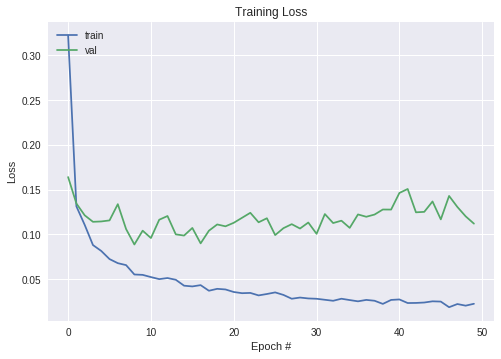

In [4]:
def train_deep_net(learning_rate, batch_size, num_epochs, act_function, optimizer, pkeep_tr):
  # Creamos placeholders para ir almacenando los datos de entrada y los labels
  X = tf.placeholder(tf.float32, [None, 784]) #(X) # Imágenes del mnist: 28*28 = 784
  Y_true = tf.placeholder(tf.float32, [None, 10]) #(X) # Número indicando la clase 0-9 => 10 clases
  pkeep = tf.placeholder(tf.float32)#(X) # Placeholder para dropout
  
  # Creamos e inicializamos las variables W y b con valores aleatorios que sigan una distribución normal
  W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1)) #(X)
  B1 = tf.Variable(tf.zeros([200])) #(X)
  W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1)) #(X)
  B2 = tf.Variable(tf.zeros([100])) #(X)
  W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1)) #(X)
  B3 = tf.Variable(tf.zeros([60])) #(X)
  W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1)) #(X)
  B4 = tf.Variable(tf.zeros([30])) #(X)
  W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1)) #(X)
  B5 = tf.Variable(tf.zeros([10])) #(X)

  # Calculamos las predicciones
  Y1 = act_function(tf.matmul(X,W1) + B1) #(X)
  Y1d = tf.nn.dropout(Y1, pkeep)
  Y2 = act_function(tf.matmul(Y1d,W2) + B2) #(X)
  Y2d = tf.nn.dropout(Y2, pkeep)
  Y3 = act_function(tf.matmul(Y2d,W3) + B3) #(X)
  Y3d = tf.nn.dropout(Y3, pkeep)
  Y4 = act_function(tf.matmul(Y3d,W4) + B4) #(X)
  Y4d = tf.nn.dropout(Y4, pkeep)
  Y_logits = tf.matmul(Y4d,W5) + B5
  Y_pred = tf.nn.softmax(Y_logits) #(X)

  # Definimos función de pérdidas (Cross_entropy)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y_logits, labels=Y_true))
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true * tf.log(Y_pred), reduction_indices=1)) #(X)
  #loss = tf.reduce_mean(-tf.reduce_sum(Y_true*tf.log(Y_pred), reduction_indices=1))

  # Optimizador SGD
  train = optimizer(lr).minimize(loss) #(X)

  # % de predicciones correctas en un determinado batch (i.e. accuracy)
  is_correct = tf.equal(tf.argmax(Y_pred,1), tf.argmax(Y_true,1))
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
  # Inicializamos variables
  init = tf.initializers.global_variables() #(X)

  # Abrimos la sesión
  with tf.Session() as sess:
    sess.run(init) #(X)
    # Entrenamiento de nuestra red
    acc_epoch_tr = []
    acc_epoch_val = []
    loss_epoch_tr = []
    loss_epoch_val = []
    for epoch in range(n_epochs):
      avg_acc = 0.
      avg_loss = 0.
      steps = int(mnist.train.num_examples/batch_size) #(X) Calcular número de batches
      for i in range(steps):
        batch_X, batch_Y = mnist.train.next_batch(batch_size) #(X) # Pedir un nuevo batch del set de datos (emplear función next_batch)
        sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y, pkeep: pkeep_tr}) #(X) # Entrenamos 
        a,l = sess.run([accuracy, loss], feed_dict={X: batch_X, Y_true: batch_Y, pkeep: 1.0}) #(X) # Calculamos accuracy y cross_entropy del batch
        avg_acc += a / steps #(X) Calcular el accuracy medio de los diferentes batches
        avg_loss += l / steps #(X) Calcular las pérdidas medias de los diferentes batches
      # Almacenamos el accuracy y las losses medios para cada época
      acc_epoch_tr.append(avg_acc) #(X)
      loss_epoch_tr.append(avg_loss) #(X)
      # Calculamos accuracy y losses en validation
      a_val, l_val = sess.run([accuracy, loss], feed_dict={X: mnist.validation.images, Y_true: mnist.validation.labels, pkeep: 1.0}) #(X)
      acc_epoch_val.append(a_val) #(X)
      loss_epoch_val.append(l_val) #(X)
      # Sacamos información por pantalla
      print("[INFO]: Época {} ---> Acc_train = {} - Loss_train = {} - Acc_val = {} - Loss_val = {}".format(epoch, avg_acc, avg_loss, a_val, l_val)) #(X)

    # Cálculo de accuracy y losses en el conjunto de test
    a_test, l_test = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels, pkeep: 1.0}) #(X)
    print("[INFO]: Accuracy en test = {} - Losses en test = {}".format(a_test, l_test)) #(X)

    # Gráficar losses por época
    plt.plot(np.arange(0, n_epochs), loss_epoch_tr) #(X)
    plt.plot(np.arange(0, n_epochs), loss_epoch_val)
    plt.legend(['train', 'val'], loc='upper left')
    plt.title('Training Loss') #(X)
    plt.xlabel('Epoch #') #(X)
    plt.ylabel('Loss') #(X)
    
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.75
act_function = tf.nn.relu
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.7616550116550109 - Loss_train = 0.7251597385167514 - Acc_val = 0.9107999801635742 - Loss_val = 0.3847469687461853
[INFO]: Época 1 ---> Acc_train = 0.9270287004662014 - Loss_train = 0.30365606626638986 - Acc_val = 0.9345999956130981 - Loss_val = 0.28586599230766296
[INFO]: Época 2 ---> Acc_train = 0.9377185314685336 - Loss_train = 0.2532524989270944 - Acc_val = 0.9458000063896179 - Loss_val = 0.25054052472114563
[INFO]: Época 3 ---> Acc_train = 0.9465326340326361 - Loss_train = 0.22124498361821485 - Acc_val = 0.9444000124931335 - Loss_val = 0.24548937380313873
[INFO]: Época 4 ---> Acc_train = 0.9499016608391629 - Loss_train = 0.205604914037428 - Acc_val = 0.9517999887466431 - Loss_val = 0.21972544491291046
[INFO]: Época 5 ---> Acc_train = 0.9546000874125891 - Loss_train = 0.19227464413726247 - Acc_val = 0.954200029373169 - Loss_val = 0.19735264778137207
[INFO]: Época 6 ---> Acc_train = 0.9562390734265753 - Loss_train = 0.1842265851743573 - Acc_val = 0.

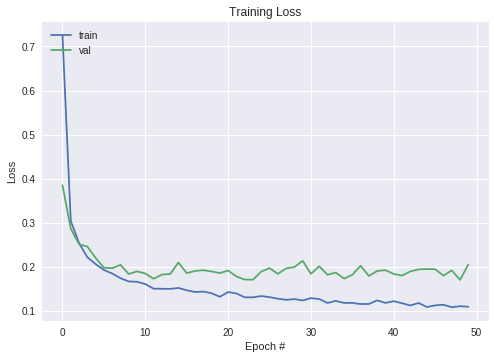

In [5]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.relu
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

**EJERCICIO 6.** Para finalizar la sesión práctica, vamos a lanzar diversas ejecuciones de nuestra red neuronal profunda para **analizar el comportamiento** del proceso de entrenamiento cuando se emplean **diferentes funciones de activación y optimizadores**.

- En primer lugar, realiza diversas ejecuciones de la red anterior (**```pkeep_tr= 0.5```**) llamando a  ```train_deep_net```  con las siguientes funciones de activación: **```act_function = tf.nn.tanh```**, **```act_function = tf.nn.sigmoid```** , **```act_function = tf.nn.leaky_relu```** , **```act_function = tf.nn.leaky_elu```** y **```act_function = tf.nn.leaky_selu```**  . ¿Que observas en las diferentes ejecuciones?¿Que función de activación es la que mejor funciona?¿Es muy alto el impacto de la función de activación en la precisión del modelo para esta aplicación? **Sol.** Para esta aplicación en concreto la sigmoide se comporta bastante bien, de hecho mejor que relu y sus variantes puesto que con estas se produce más overfitting y la precisión no es tan buena. Para el problema bajo esudio la función de activación correcta nos proporciona un 3-4% de precisión.

[INFO]: Época 0 ---> Acc_train = 0.8438592657342651 - Loss_train = 0.5594749199204788 - Acc_val = 0.9097999930381775 - Loss_val = 0.3604612946510315
[INFO]: Época 1 ---> Acc_train = 0.9141353438228447 - Loss_train = 0.33895525096596546 - Acc_val = 0.9228000044822693 - Loss_val = 0.3105672299861908
[INFO]: Época 2 ---> Acc_train = 0.9238964160839164 - Loss_train = 0.3083134037735578 - Acc_val = 0.9308000206947327 - Loss_val = 0.29242491722106934
[INFO]: Época 3 ---> Acc_train = 0.9284309440559445 - Loss_train = 0.2903064058655071 - Acc_val = 0.9340000152587891 - Loss_val = 0.2699795961380005
[INFO]: Época 4 ---> Acc_train = 0.9323827214452222 - Loss_train = 0.28056383059991813 - Acc_val = 0.9373999834060669 - Loss_val = 0.2617012560367584
[INFO]: Época 5 ---> Acc_train = 0.9335118006993008 - Loss_train = 0.2770414858848066 - Acc_val = 0.9366000294685364 - Loss_val = 0.261967271566391
[INFO]: Época 6 ---> Acc_train = 0.9362434440559444 - Loss_train = 0.2675661666271016 - Acc_val = 0.9314

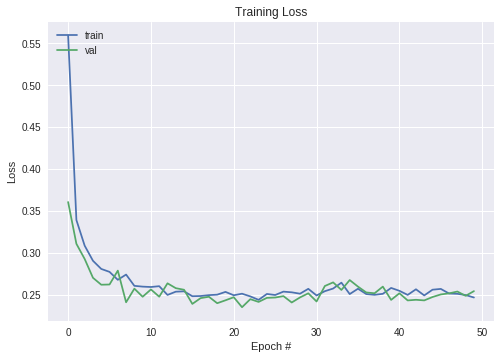

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.tanh
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.5715690559440559 - Loss_train = 1.1902854710747874 - Acc_val = 0.8068000078201294 - Loss_val = 0.6691319346427917
[INFO]: Época 1 ---> Acc_train = 0.8622159090909084 - Loss_train = 0.5163245814524607 - Acc_val = 0.9046000242233276 - Loss_val = 0.4044353663921356
[INFO]: Época 2 ---> Acc_train = 0.9241695804195817 - Loss_train = 0.3419356511814613 - Acc_val = 0.9404000043869019 - Loss_val = 0.28764480352401733
[INFO]: Época 3 ---> Acc_train = 0.9441105769230788 - Loss_train = 0.2580693894193999 - Acc_val = 0.9473999738693237 - Loss_val = 0.25459107756614685
[INFO]: Época 4 ---> Acc_train = 0.9524876165501176 - Loss_train = 0.20834123666261475 - Acc_val = 0.9549999833106995 - Loss_val = 0.2068428248167038
[INFO]: Época 5 ---> Acc_train = 0.9567854020979037 - Loss_train = 0.18381447958953165 - Acc_val = 0.9598000049591064 - Loss_val = 0.1869053691625595
[INFO]: Época 6 ---> Acc_train = 0.958406177156179 - Loss_train = 0.1703379595682616 - Acc_val = 0.959

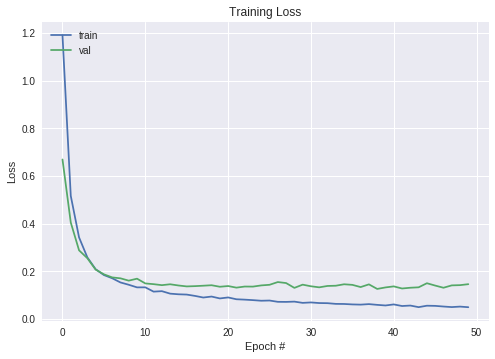

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.sigmoid
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.8633996212121218 - Loss_train = 0.4734215434892477 - Acc_val = 0.9211999773979187 - Loss_val = 0.2667785882949829
[INFO]: Época 1 ---> Acc_train = 0.9351507867132883 - Loss_train = 0.22257564713557565 - Acc_val = 0.9467999935150146 - Loss_val = 0.21543176472187042
[INFO]: Época 2 ---> Acc_train = 0.9416520979020996 - Loss_train = 0.2006728673627325 - Acc_val = 0.9485999941825867 - Loss_val = 0.1941075474023819
[INFO]: Época 3 ---> Acc_train = 0.9483355186480195 - Loss_train = 0.18146274112911764 - Acc_val = 0.9495999813079834 - Loss_val = 0.19269153475761414
[INFO]: Época 4 ---> Acc_train = 0.951722756410258 - Loss_train = 0.17014038045228502 - Acc_val = 0.9539999961853027 - Loss_val = 0.17964491248130798
[INFO]: Época 5 ---> Acc_train = 0.9546000874125898 - Loss_train = 0.16182456715227836 - Acc_val = 0.9574000239372253 - Loss_val = 0.18317820131778717
[INFO]: Época 6 ---> Acc_train = 0.9560023310023321 - Loss_train = 0.15992934162140165 - Acc_val = 

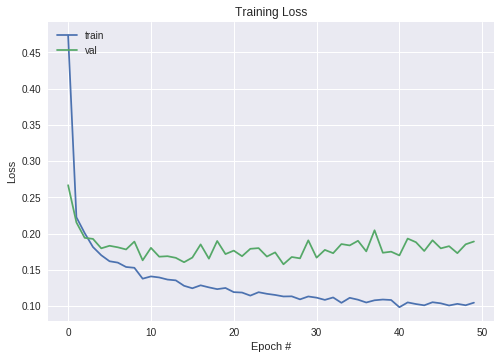

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.leaky_relu
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.8754734848484836 - Loss_train = 0.42470032192054585 - Acc_val = 0.9381999969482422 - Loss_val = 0.23195712268352509
[INFO]: Época 1 ---> Acc_train = 0.9421437937062948 - Loss_train = 0.21361816361859118 - Acc_val = 0.9508000016212463 - Loss_val = 0.17767219245433807
[INFO]: Época 2 ---> Acc_train = 0.9524694055944068 - Loss_train = 0.1798945261656124 - Acc_val = 0.9593999981880188 - Loss_val = 0.17082424461841583
[INFO]: Época 3 ---> Acc_train = 0.9580237470862478 - Loss_train = 0.16262009978893555 - Acc_val = 0.9610000252723694 - Loss_val = 0.15774968266487122
[INFO]: Época 4 ---> Acc_train = 0.9611924533799543 - Loss_train = 0.15229087491196294 - Acc_val = 0.9625999927520752 - Loss_val = 0.16530923545360565
[INFO]: Época 5 ---> Acc_train = 0.9653809731934734 - Loss_train = 0.13503352369210042 - Acc_val = 0.9657999873161316 - Loss_val = 0.15034133195877075
[INFO]: Época 6 ---> Acc_train = 0.9675662878787881 - Loss_train = 0.12741734456305662 - Acc_va

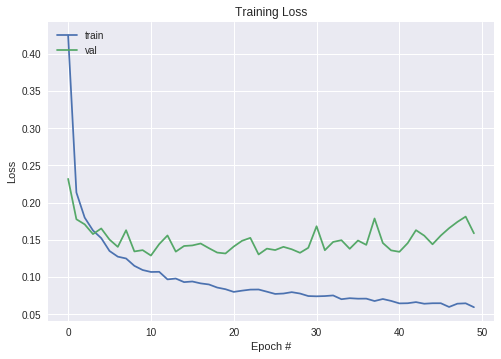

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.elu
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.8648200757575757 - Loss_train = 0.4633618490054061 - Acc_val = 0.9273999929428101 - Loss_val = 0.2726607620716095
[INFO]: Época 1 ---> Acc_train = 0.9316360722610737 - Loss_train = 0.24665983561383004 - Acc_val = 0.9470000267028809 - Loss_val = 0.2127484679222107
[INFO]: Época 2 ---> Acc_train = 0.9457313519813532 - Loss_train = 0.20618566534631738 - Acc_val = 0.9521999955177307 - Loss_val = 0.2059307098388672
[INFO]: Época 3 ---> Acc_train = 0.951486013986016 - Loss_train = 0.18773540863137697 - Acc_val = 0.9577999711036682 - Loss_val = 0.17421205341815948
[INFO]: Época 4 ---> Acc_train = 0.957495629370631 - Loss_train = 0.16473637784381828 - Acc_val = 0.9599999785423279 - Loss_val = 0.1741936206817627
[INFO]: Época 5 ---> Acc_train = 0.959098193473195 - Loss_train = 0.16430211461980634 - Acc_val = 0.9598000049591064 - Loss_val = 0.18132218718528748
[INFO]: Época 6 ---> Acc_train = 0.9627585955710973 - Loss_train = 0.14799990228514057 - Acc_val = 0.9

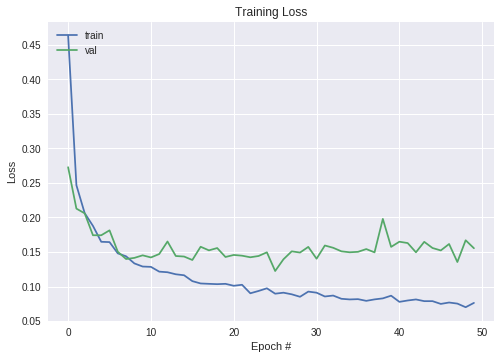

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.selu
optimizer = tf.train.AdamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

- Para finalizar, realiza diversas ejecuciones de la red anterior (**```pkeep_tr= 0.5```**) empleando **```act_function = tf.nn.sigmoid```** con los siguientes optimizadores: **```tf.contrib.opt.NadamOptimizer```** y **```tf.train.RMSPropOptimizer```**  . Comparalos con la ejecución anterior del **SGD** utilizando la sigmoide.¿Que optimizador proporciona mejores resultados?¿Es muy alto el impacto del optimizador en la precisión del modelo para esta aplicación? **Sol.** Nadam optimizer proporciona 0.05% más de precisión que SGD y 0.3% más que RMSprop. En esta aplicación el optimizador no es decisivo en cuanto a precisión obtenida. 

[INFO]: Época 0 ---> Acc_train = 0.5098885489510491 - Loss_train = 1.205710654492144 - Acc_val = 0.6322000026702881 - Loss_val = 0.7927154898643494
[INFO]: Época 1 ---> Acc_train = 0.8426573426573417 - Loss_train = 0.5453270835267913 - Acc_val = 0.9228000044822693 - Loss_val = 0.3755722641944885
[INFO]: Época 2 ---> Acc_train = 0.9322916666666675 - Loss_train = 0.31058182237378934 - Acc_val = 0.9422000050544739 - Loss_val = 0.2600368559360504
[INFO]: Época 3 ---> Acc_train = 0.947097173659675 - Loss_train = 0.23013964738253945 - Acc_val = 0.9534000158309937 - Loss_val = 0.2214704304933548
[INFO]: Época 4 ---> Acc_train = 0.9558384324009342 - Loss_train = 0.1874402189119297 - Acc_val = 0.9611999988555908 - Loss_val = 0.1857900321483612
[INFO]: Época 5 ---> Acc_train = 0.9603911713286735 - Loss_train = 0.16772783268894356 - Acc_val = 0.9620000123977661 - Loss_val = 0.17575691640377045
[INFO]: Época 6 ---> Acc_train = 0.9641608391608402 - Loss_train = 0.14942633519535287 - Acc_val = 0.960

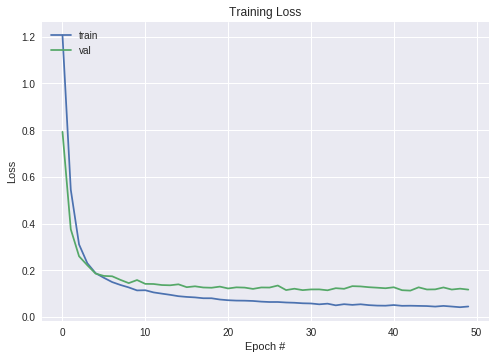

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.sigmoid
optimizer = tf.contrib.opt.NadamOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)

[INFO]: Época 0 ---> Acc_train = 0.6772472319347326 - Loss_train = 1.003376589718954 - Acc_val = 0.9243999719619751 - Loss_val = 0.3248136639595032
[INFO]: Época 1 ---> Acc_train = 0.9467875874125896 - Loss_train = 0.20506089569735908 - Acc_val = 0.942799985408783 - Loss_val = 0.2530144155025482
[INFO]: Época 2 ---> Acc_train = 0.9612470862470883 - Loss_train = 0.15062101603874248 - Acc_val = 0.9585999846458435 - Loss_val = 0.19850894808769226
[INFO]: Época 3 ---> Acc_train = 0.9644886363636375 - Loss_train = 0.14107768047418637 - Acc_val = 0.9611999988555908 - Loss_val = 0.2251087874174118
[INFO]: Época 4 ---> Acc_train = 0.9687864219114225 - Loss_train = 0.12930554825170001 - Acc_val = 0.9628000259399414 - Loss_val = 0.1873796582221985
[INFO]: Época 5 ---> Acc_train = 0.9710992132867129 - Loss_train = 0.11662328952710664 - Acc_val = 0.9599999785423279 - Loss_val = 0.21618695557117462
[INFO]: Época 6 ---> Acc_train = 0.973029574592074 - Loss_train = 0.11209492211062932 - Acc_val = 0.9

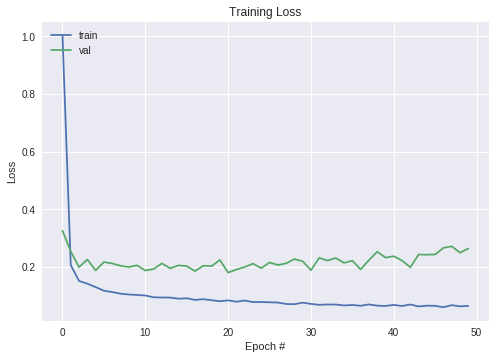

In [0]:
b_size = 128
n_epochs = 50
lr = 0.005
pkeep_tr = 0.5
act_function = tf.nn.relu
optimizer = tf.train.RMSPropOptimizer
train_deep_net(lr, b_size, n_epochs, act_function, optimizer, pkeep_tr)